# Define json file directories

In [63]:
stereoset_results_dir = '../results/stereoset_CDA_processed/llama2/gender'
crows_results_dir = '../results/crows_CDA/crows_m-CDALlama2LMHeadModel_c-meta-llama_Llama-2-7b-hf_t-gender.json'

training_output_dir = '../results/CDA_FT/llama2/gender'

before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf_s-42.json'
before_debias_crows_results_dir = '../results/crows/crows_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf.json'

In [64]:
import json
# Load datas

# Load training data
with open(f'{training_output_dir}/trainer_state.json', 'r') as f:
    model_logs = json.load(f)
    
# Load stereoset data
with open(f'{stereoset_results_dir}/combined.json', 'r') as f:
    stereoset_results = json.load(f)
    
# Load crows data
with open(crows_results_dir, 'r') as f:
    crows_results = json.load(f)
    
with open(before_debias_stereoset_results_dir, 'r') as f:
    before_debias_stereoset_results = json.load(f)
    
with open(before_debias_crows_results_dir, 'r') as f:
    before_debias_crows_results = json.load(f)

In [65]:
# Extract key values from training data
log_history = model_logs["log_history"][:-1] # Exclude last entry because it is the final train results
# Extract the loss and step values from the model output
losses = [d['loss'] for d in log_history]
steps = [d['step'] for d in log_history]
lr = [d['learning_rate'] for d in log_history]
grad_norm = [d['grad_norm'] for d in log_history]
epoch = [d['epoch'] for d in log_history]

In [66]:
focused_category = "gender"

In [67]:
stereoset_ss = []
stereoset_lm = []
stereoset_icat = []
# Extract key values from stereoset data
for ckpt_num in range(100, 2000, 100):
    stereoset_ss.append(stereoset_results[f"{ckpt_num}"]['intrasentence'][focused_category]["SS Score"])
    stereoset_lm.append(stereoset_results[f"{ckpt_num}"]['intrasentence'][focused_category]["LM Score"])
    stereoset_icat.append(stereoset_results[f"{ckpt_num}"]['intrasentence'][focused_category]["ICAT Score"])

In [68]:
# Extract key values from crows data
crows_ss = []
crows_ass = []
crows_ms = []
# Extract key values from crows data
for ckpt_num in range(100, 2000, 100):
    crows_ss.append(crows_results[f"{ckpt_num}"][focused_category]["Stereotype score"])
    crows_ass.append(crows_results[f"{ckpt_num}"][focused_category]["Anti-stereotype score"])
    crows_ms.append(crows_results[f"{ckpt_num}"][focused_category]["Metric score"])

In [69]:
# Extract before debias stereoset benchmark data
stereoset_before_debias_ss = before_debias_stereoset_results[list(before_debias_stereoset_results.keys())[0]]['intrasentence'][focused_category]["SS Score"]
stereoset_before_debias_lm = before_debias_stereoset_results[list(before_debias_stereoset_results.keys())[0]]['intrasentence'][focused_category]["LM Score"]
stereoset_before_debias_icat = before_debias_stereoset_results[list(before_debias_stereoset_results.keys())[0]]['intrasentence'][focused_category]["ICAT Score"]

In [70]:
# Extract before debias crows benchmark data
crows_before_debias_ss = before_debias_crows_results[focused_category]["Stereotype score"]
crows_before_debias_ass = before_debias_crows_results[focused_category]["Anti-stereotype score"]
crows_before_debias_ms = before_debias_crows_results[focused_category]["Metric score"]

# Plot training loss graph

Text(0.5, 1.0, 'Training loss per step')

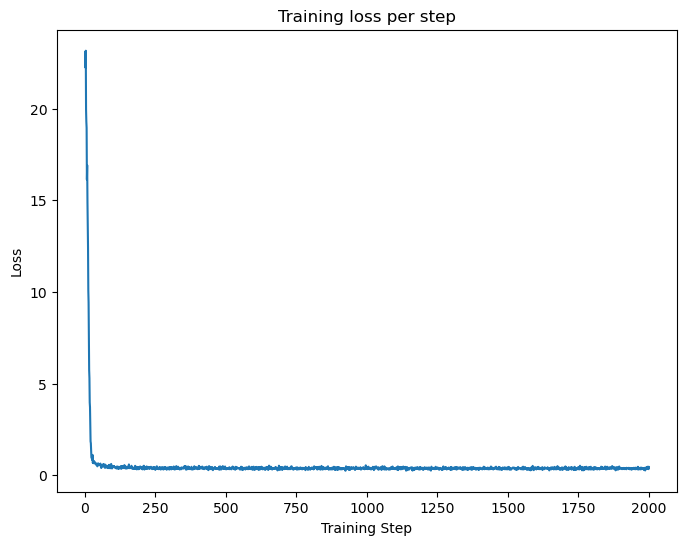

In [71]:
import matplotlib.pyplot as plt
import os


# Plot loss vs. step
plt.figure(figsize=(8, 6))
plt.plot(steps, losses)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Training loss per step')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))

# Plot training loss + stereoset stereotype score graph

Text(0, 66.51673467203203, 'Before CDA')

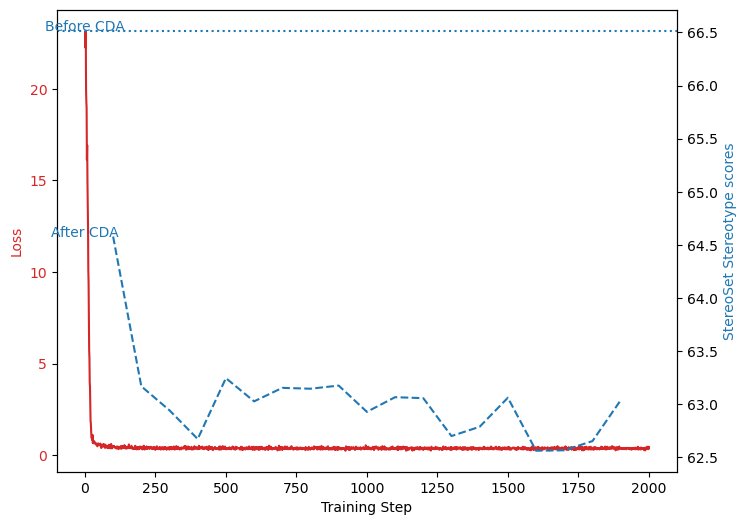

In [72]:
import matplotlib.pyplot as plt
import os

# Plot loss vs step vs stereoset
# Left axis: Loss
# Right axis: Stereoset scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('StereoSet Stereotype scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), stereoset_ss, label='SS Score', color='tab:blue', linestyle='dashed')
# Label the line header for the debiased ss score
ax2.text(0, stereoset_ss[0], f'After CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=stereoset_before_debias_ss, color='tab:blue', linestyle='dotted', label='Before Debias SS Score')
# Label the line header for the original ss score
ax2.text(0, stereoset_before_debias_ss, f'Before CDA', color='tab:blue', ha='center')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))

# Plot training loss + stereoset lm score graph

Text(0, 89.02569423099158, 'Before CDA')

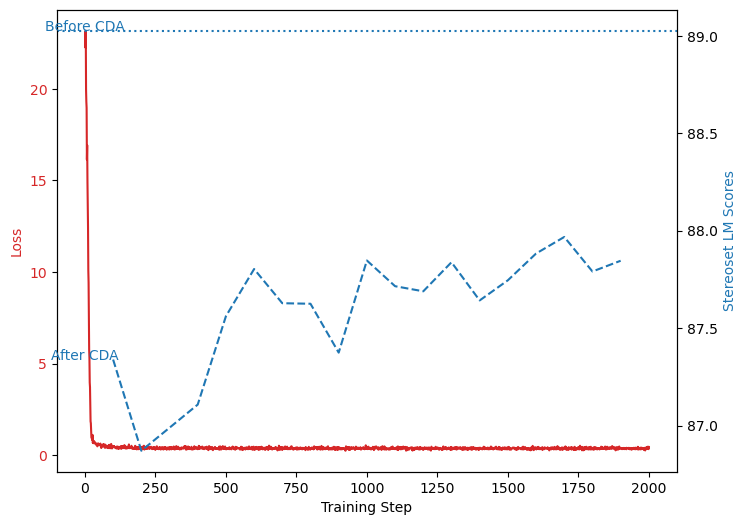

In [73]:
import matplotlib.pyplot as plt

# Plot loss vs step vs stereoset
# Left axis: Loss
# Right axis: stereoset LM scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('Stereoset LM Scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), stereoset_lm, label='LM Score', color='tab:blue', linestyle='dashed')
# Label the line header for the debiased LM score
ax2.text(0, stereoset_lm[0], f'After CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=stereoset_before_debias_lm, color='tab:blue', linestyle='dotted', label='Before Debias LM Score')
# Label the line header for the original ss score
ax2.text(0, stereoset_before_debias_lm, f'Before CDA', color='tab:blue', ha='center')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))

# Plot training loss + stereoset icat score graph

Text(0, 59.61741881885677, 'Before CDA')

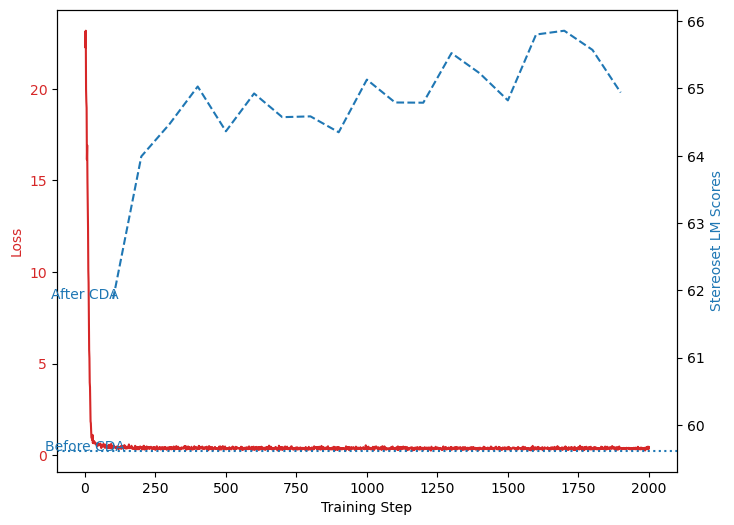

In [74]:
import matplotlib.pyplot as plt

# Plot loss vs step vs stereoset
# Left axis: Loss
# Right axis: stereoset LM scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('Stereoset LM Scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), stereoset_icat, label='LM Score', color='tab:blue', linestyle='dashed')
# Label the line header for the debiased LM score
ax2.text(0, stereoset_icat[0], f'After CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=stereoset_before_debias_icat, color='tab:blue', linestyle='dotted', label='Before Debias LM Score')
# Label the line header for the original ss score
ax2.text(0, stereoset_before_debias_icat, f'Before CDA', color='tab:blue', ha='center')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))

# Training loss + crows ss score graph

Text(0, 67.3, 'Before CDA')

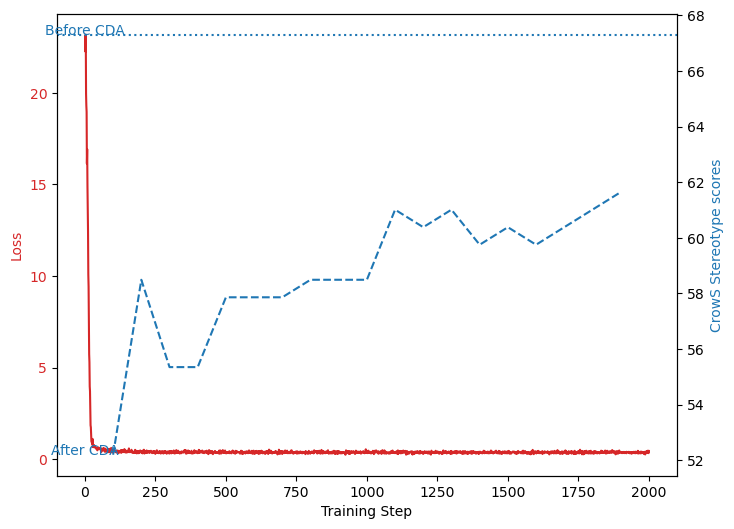

In [75]:
import matplotlib.pyplot as plt


# Plot loss vs step vs crows scores
# Left axis: Loss
# Right axis: Crows scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('CrowS Stereotype scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), crows_ss, label='SS Score', color='tab:blue', linestyle='dashed')
# Label the line header for the debiased ss score
ax2.text(0, crows_ss[0], f'After CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=crows_before_debias_ss, color='tab:blue', linestyle='dotted', label='Before Debias SS Score')
# Label the line header for the original ss score
ax2.text(0, crows_before_debias_ss, f'Before CDA', color='tab:blue', ha='center')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))


# Training loss + crows Anti-stereotype score graph

Text(0, 60.19, 'Before CDA')

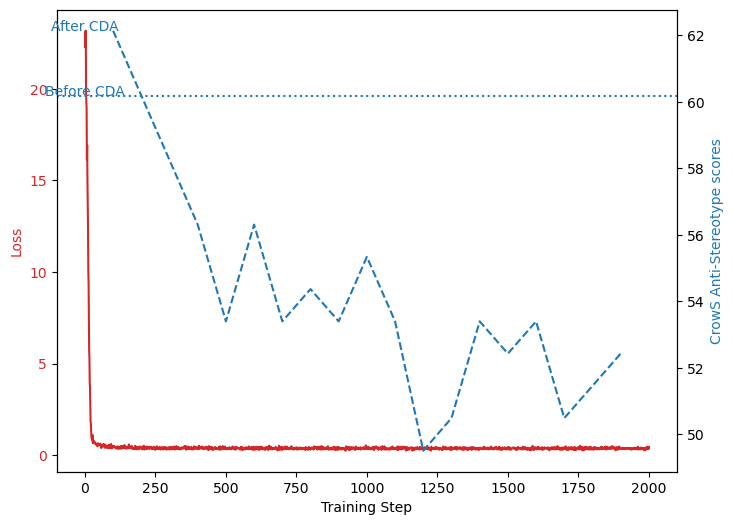

In [78]:
import matplotlib.pyplot as plt


# Plot loss vs step vs crows scores
# Left axis: Loss
# Right axis: Crows scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('CrowS Anti-Stereotype scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), crows_ass, label='SS Score', color='tab:blue', linestyle='dashed')
# Label the line header for the debiased ss score
ax2.text(0, crows_ass[0], f'After CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=crows_before_debias_ass, color='tab:blue', linestyle='dotted', label='Before Debias ASS Score')
# Label the line header for the original ss score
ax2.text(0, crows_before_debias_ass, f'Before CDA', color='tab:blue', ha='center')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))


# Training loss + crows metric score graph

Text(0, 64.5, 'Before CDA')

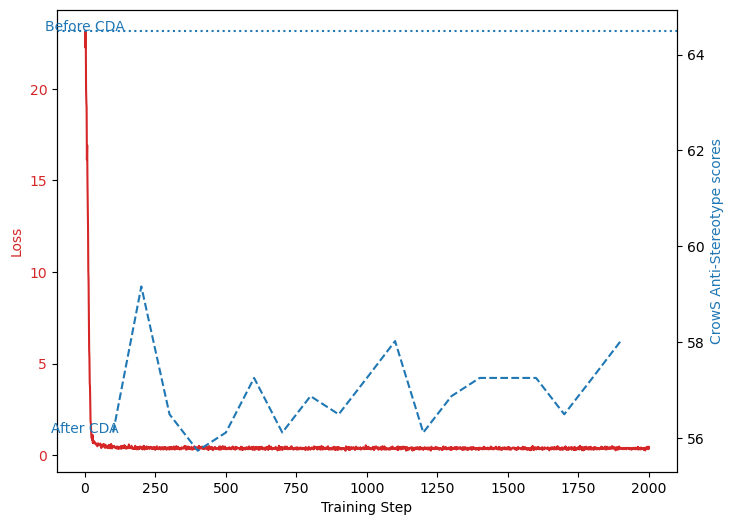

In [79]:
import matplotlib.pyplot as plt


# Plot loss vs step vs crows scores
# Left axis: Loss
# Right axis: Crows scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('CrowS Metric scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), crows_ms, label='SS Score', color='tab:blue', linestyle='dashed')
# Label the line header for the debiased ss score
ax2.text(0, crows_ms[0], f'After CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=crows_before_debias_ms, color='tab:blue', linestyle='dotted', label='Before Debias ASS Score')
# Label the line header for the original ss score
ax2.text(0, crows_before_debias_ms, f'Before CDA', color='tab:blue', ha='center')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))


# Training loss + crows ss score + stereoset ss score

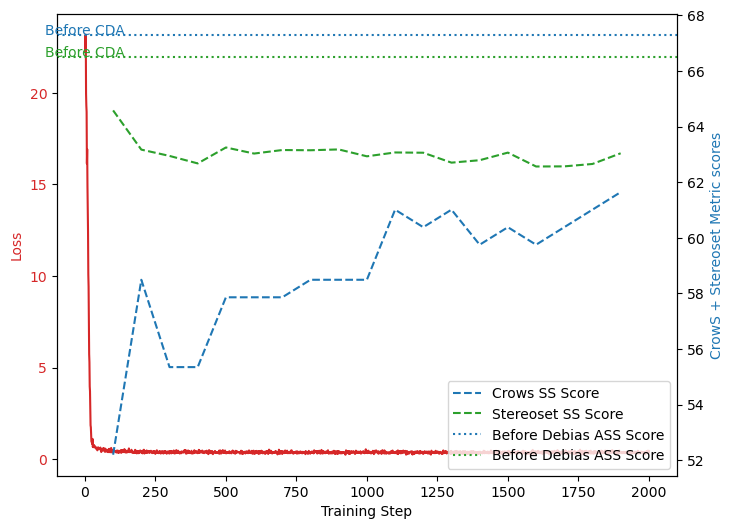

In [84]:
import matplotlib.pyplot as plt


# Plot loss vs step vs crows scores
# Left axis: Loss
# Right axis: Crows scores
# Bottom axis: Step

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(steps, losses, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# instantiate a second axes that shares the same x-axis, different steps, only saved 1 result per 100 steps
# 1st element is 100 steps, 2nd element is 200 steps, etc.
ax2 = ax1.twinx()
ax2.set_ylabel('CrowS + Stereoset Metric scores', color='tab:blue')
ax2.plot(range(100, 2000, 100), crows_ss, label='Crows SS Score', color='tab:blue', linestyle='dashed')
ax2.plot(range(100, 2000, 100), stereoset_ss, label='Stereoset SS Score', color='tab:green', linestyle='dashed')

# Draw a line for the original ss score
ax2.axhline(y=crows_before_debias_ss, color='tab:blue', linestyle='dotted', label='Before Debias ASS Score')
# Label the line header for the original ss score
ax2.text(0, crows_before_debias_ss, f'Before CDA', color='tab:blue', ha='center')

# Draw a line for the original ss score
ax2.axhline(y=stereoset_before_debias_ss, color='tab:green', linestyle='dotted', label='Before Debias ASS Score')
# Label the line header for the original ss score
ax2.text(0, stereoset_before_debias_ss, f'Before CDA', color='tab:green', ha='center')

plt.legend(loc='lower right')

# Save the plot
# plt.savefig(os.path.join("../report_visuals", "training_loss_graph.png"))
